In [4]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv("Housing.csv")
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [6]:
dataset.shape

(545, 13)

In [7]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


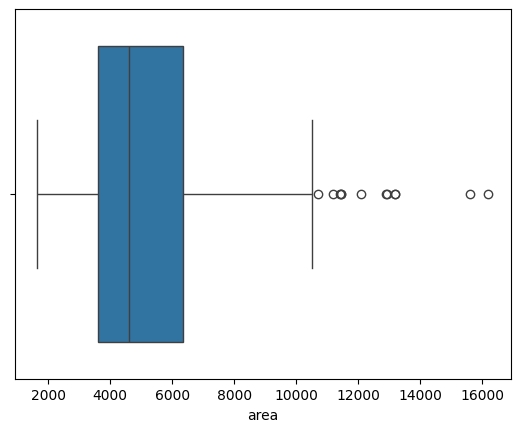

In [9]:
sns.boxplot(x="area",data=dataset)
plt.show()

In [10]:
q1=dataset["area"].quantile(0.25)
q3=dataset["area"].quantile(0.75)

In [11]:
IQR=q3-q1

In [12]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-540.0, 10500.0)

In [13]:
dataset.shape

(545, 13)

In [14]:
new_dataset=dataset[dataset["area"]<=max_range]

In [15]:
new_dataset.shape

(533, 13)

<Axes: xlabel='area'>

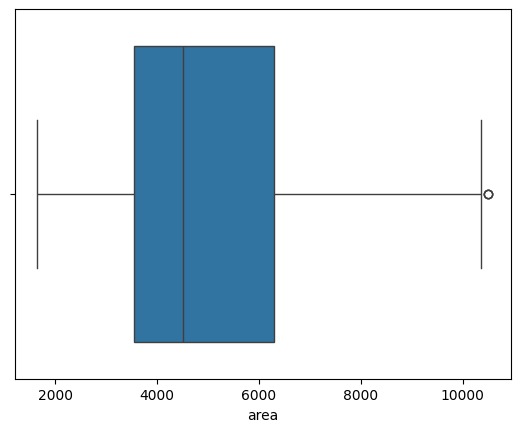

In [16]:
sns.boxplot(x="area",data=new_dataset)

In [17]:
# sns.pairplot(data=new_dataset)
# plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
columns_of_encoding=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

In [21]:
new_dataset["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [22]:
for column in columns_of_encoding:
    new_dataset.loc[:,column] = le.fit_transform(new_dataset[column])
    
#.loc use use for a multi-columns  

In [23]:
new_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [24]:
# sns.heatmap(data=dataset.corr(),annot=True)
# plt.show()

In [25]:
x=new_dataset.iloc[:,1:13]
y=new_dataset["price"]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=52)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.score(x_test,y_test)*100

65.08507630249582

In [31]:
lr.predict(x_test)

array([ 3322992.56011564,  3627705.71122905,  6492948.74031474,
        4732333.87863085,  1922194.09481362,  3511589.1011719 ,
        2625028.75658562,  6429766.21617398,  4939730.75002212,
        3184503.23408454,  4284632.91895996,  4930666.01461398,
        7004034.53877975,  2927252.43544885,  2522660.71705527,
        5998743.63734834,  4208955.86445366,  2929668.59510104,
        3037902.21433685,  2816896.90125813,  4228757.0820934 ,
        3290005.79310217,  5076846.49756318,  3096084.60352588,
        3445072.022064  ,  6281661.81077688,  3605906.783704  ,
        5272623.70068136,  4716668.66560791,  4349749.56887149,
        2273477.14801367,  5067490.3629362 ,  4915731.99074397,
        4518048.0225377 ,  7164228.30964714,  4250364.05723836,
        3605272.46292601,  6189508.09505158,  4640942.22089948,
        4042213.75983736,  4686180.27084003,  5553228.70066172,
        3960301.54214824,  5574905.87567818,  2104029.91819606,
        5239126.22866003,  3678513.61041

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
